Percentage of Hb values below 10 g/dL: 27.78%


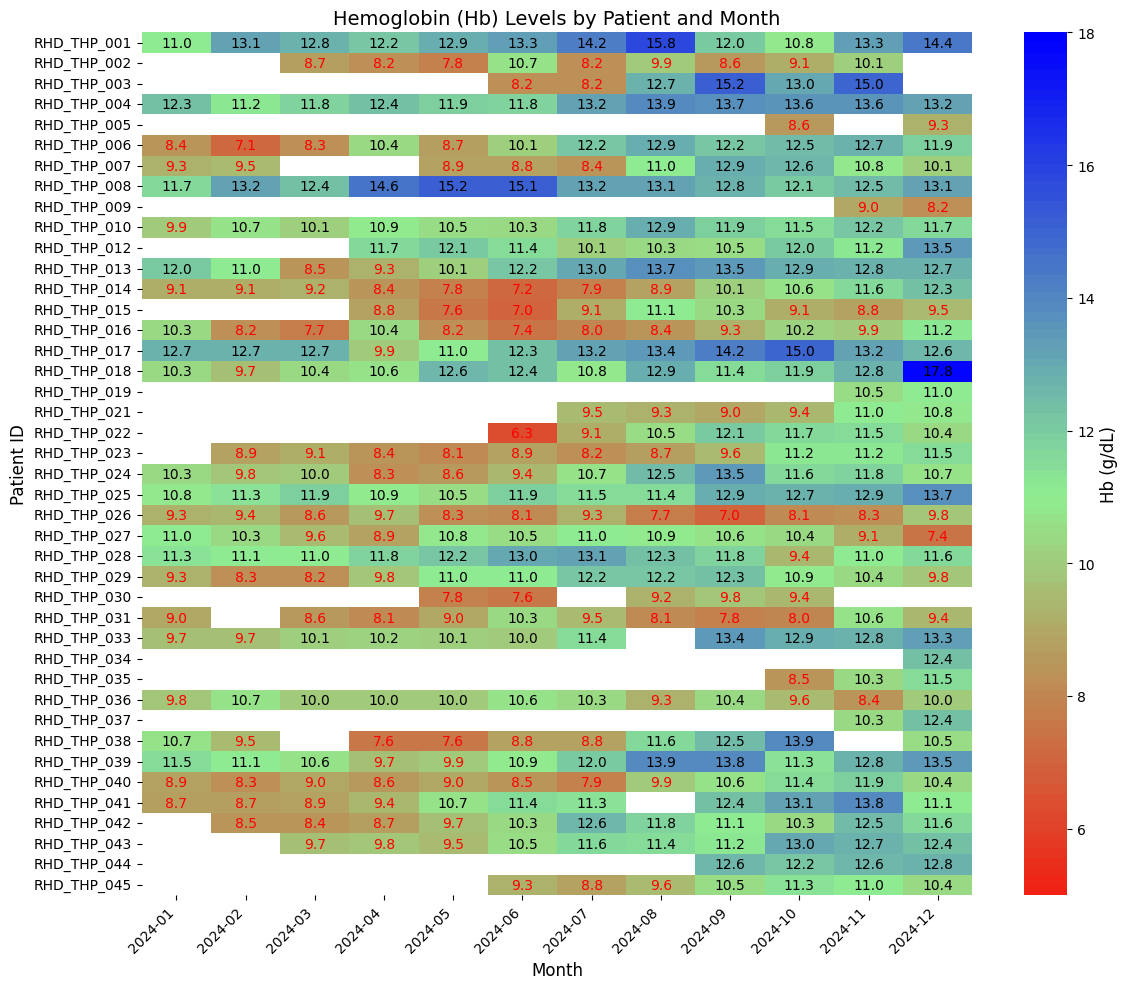

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
try:
    df = pd.read_excel('cleaned_monthly_investigations_alive.xlsx', sheet_name='Sheet1')
except FileNotFoundError:
    print("Error: 'cleaned_monthly_investigations.xlsx' not found in the working directory.")
    exit(1)

# Ensure 'Month' is in datetime format and extract month-year for columns
df['Month'] = pd.to_datetime(df['Month'])
df['Month-Year'] = df['Month'].dt.strftime('%Y-%m')

# Pivot the Hb data to create a patient vs. month matrix
pivot_df = df.pivot(index='Subject_ID', columns='Month-Year', values='Hb (g/dL)')

# Define reference range and risk thresholds
lower_bound = 10.0
upper_bound = 12.0

# Create a custom colormap: red for <10, green for >12, gradient for 10-12
colors = ['red', 'lightgreen', 'blue']  # <10, 10-12, >12
n_bins = 100
cmap = sns.blend_palette(colors, n_colors=n_bins)

# Function to annotate values <10 in red
def annotate_heatmap(data, **kwargs):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            value = data.iloc[i, j]
            if pd.notnull(value):
                color = 'red' if value < lower_bound else 'black'
                plt.text(j + 0.5, i + 0.5, f'{value:.1f}',
                         ha='center', va='center', color=color)

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_df, cmap=cmap, center=11.0,  # Center colormap at midpoint of 10-12
            annot=False, fmt='.1f', cbar_kws={'label': 'Hb (g/dL)'},
            vmin=5, vmax=18)  # Set min/max for colormap scaling
plt.gca().collections[0].colorbar.set_label('Hb (g/dL)', size=12)

# Apply custom annotations
annotate_heatmap(pivot_df)

# Customize plot
plt.title('Hemoglobin (Hb) Levels by Patient and Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Patient ID', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Calculate percentage of values below reference range (<10 g/dL)
total_values = pivot_df.size
below_ref = pivot_df[pivot_df < lower_bound].count().sum()
percentage_below = (below_ref / total_values) * 100
print(f"Percentage of Hb values below 10 g/dL: {percentage_below:.2f}%")

# Save and show the plot
plt.savefig('hb_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()